In [1]:
import csv
from Levenshtein import distance as levenshtein_distance

def calculate_metrics(csv_file):
    distances = []
    jaccard_similarities = []

    with open(csv_file, mode="r", encoding="utf-8") as file:
        reader = csv.DictReader(file)

        for row in reader:
            expected_output = row["expected_output"]
            generated_output = row["generated_output"]

            distances.append(levenshtein_distance(expected_output, generated_output))

            set1, set2 = set(expected_output), set(generated_output)
            jaccard = len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0
            jaccard_similarities.append(jaccard)

    total_distance = sum(distances)
    average_distance = total_distance / len(distances) if distances else 0

    average_jaccard = sum(jaccard_similarities) / len(jaccard_similarities) if jaccard_similarities else 0

    return average_distance, average_jaccard

In [2]:
bart_levenshtein, bart_jaccard = calculate_metrics("./results/bart_results.csv")
flant5_levenshtein, flant5_jaccard = calculate_metrics("./results/flant5_results.csv")

Tabela de Resultados:
     Model  Levenshtein Distance  Jaccard Similarity
0     BART             36.297173            0.819038
1  Flan-T5             44.868775            0.705901


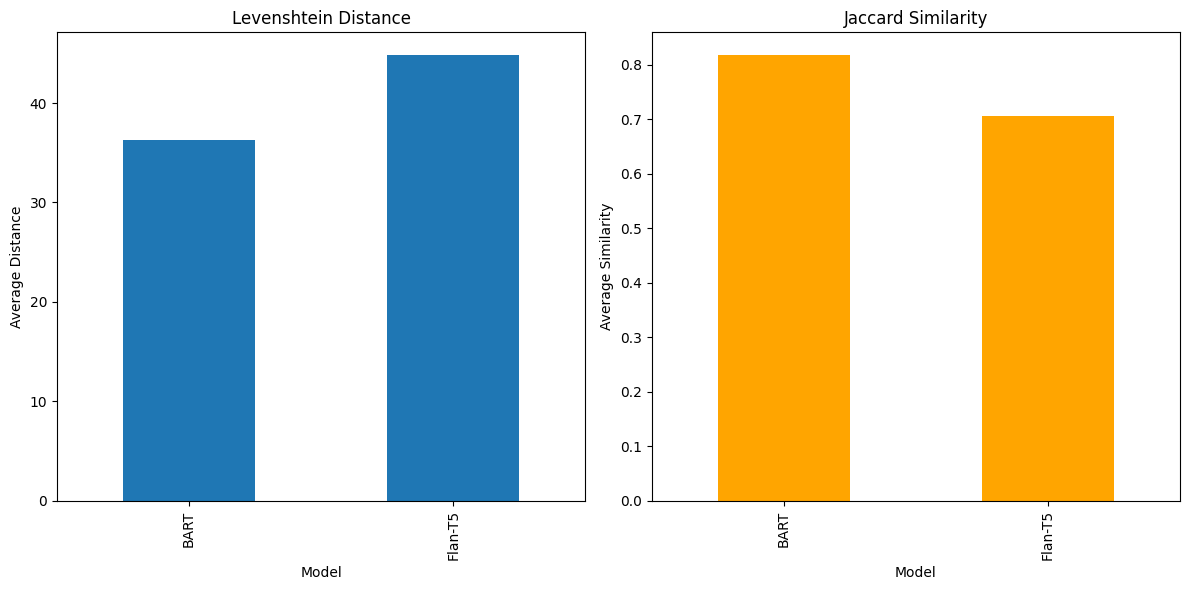

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

results = {
    "Model": ["BART", "Flan-T5"],
    "Levenshtein Distance": [bart_levenshtein, flant5_levenshtein],
    "Jaccard Similarity": [bart_jaccard, flant5_jaccard]
}

df = pd.DataFrame(results)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.plot(x="Model", y="Levenshtein Distance", kind="bar", ax=axes[0], legend=False)
axes[0].set_title("Levenshtein Distance")
axes[0].set_ylabel("Average Distance")
axes[0].set_xlabel("Model")

df.plot(x="Model", y="Jaccard Similarity", kind="bar", ax=axes[1], legend=False, color='orange')
axes[1].set_title("Jaccard Similarity")
axes[1].set_ylabel("Average Similarity")
axes[1].set_xlabel("Model")

plt.tight_layout()
plt.show()

In [9]:
bart_jaccard

0.8190379816545191

In [10]:
flant5_levenshtein

44.86877544628876

In [11]:
flant5_jaccard

0.7059007227840688